In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Task 1: Load Dataset

In [ ]:
import numpy as np
from datasets import load_dataset
train_datasets = load_dataset('ag_news', split='train')
test_dataset = load_dataset('ag_news', split='test')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
train_valid_split = train_datasets.train_test_split(test_size=0.2, seed=42)
# setting seed for reproducibility
train_data = train_valid_split['train'] # (96000 samples)
valid_data = train_valid_split['test']  # validation set (24000 samples)

In [ ]:
import seaborn as sns
import pandas as pd

def extract_labels(data, split_name):
    return pd.DataFrame({
        'label': data['label'],
        'split': split_name
    })


train_df = extract_labels(train_data, 'train')
valid_df = extract_labels(valid_data, 'validation')
test_df  = extract_labels(test_dataset, 'test')

<ipython-input-8-8c8bc6cf2333>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', ax=axes[0], palette='pastel')
<ipython-input-8-8c8bc6cf2333>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=valid_df, x='label', ax=axes[1], palette='pastel')
<ipython-input-8-8c8bc6cf2333>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x='label', ax=axes[2], palette='pastel')
<ipython-input-8-8c8bc6cf2333>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ti

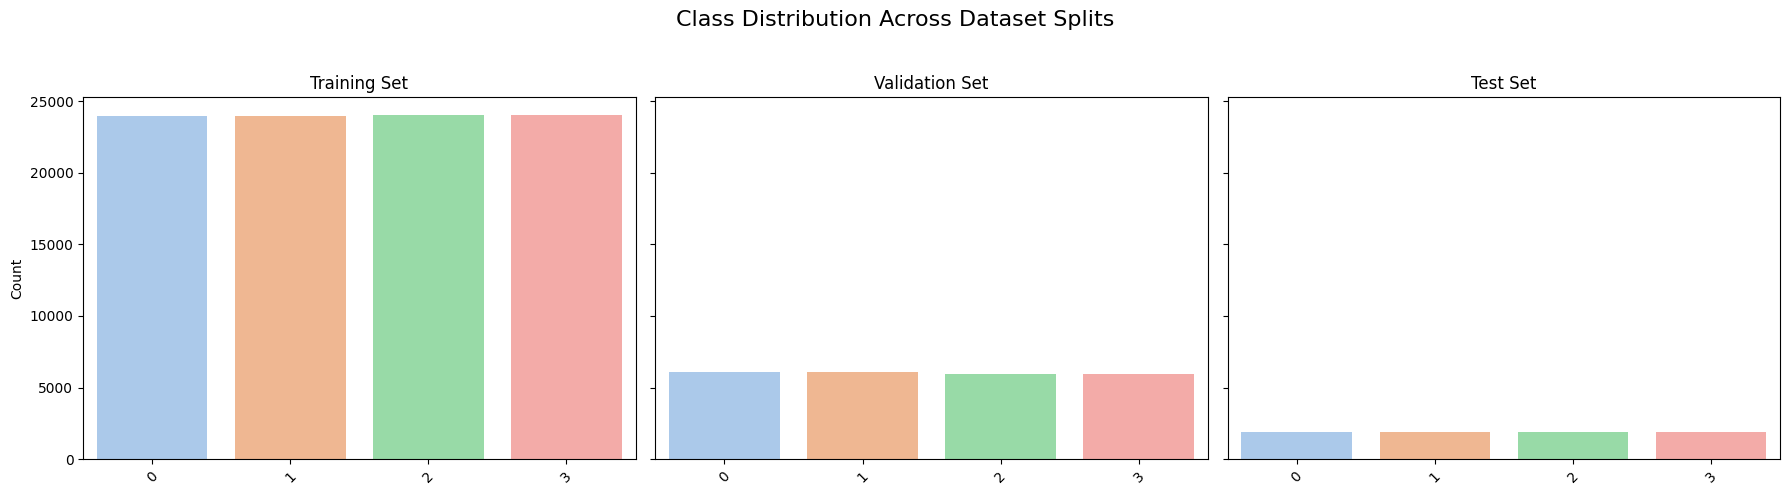

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot for each dataset split
sns.countplot(data=train_df, x='label', ax=axes[0], palette='pastel')
axes[0].set_title('Training Set')
axes[0].set_xlabel('')

sns.countplot(data=valid_df, x='label', ax=axes[1], palette='pastel')
axes[1].set_title('Validation Set')
axes[1].set_xlabel('')

sns.countplot(data=test_df, x='label', ax=axes[2], palette='pastel')
axes[2].set_title('Test Set')
axes[2].set_xlabel('')

# Common formatting
for ax in axes:
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.suptitle("Class Distribution Across Dataset Splits", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Task 2: Load pre-trained BERT model

In [ ]:
from transformers import BertTokenizer, BertModel
# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertModel.from_pretrained("google-bert/bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Task 3: Run experiments

### 3.1 Probing

#### Freeze BERT model

In [ ]:
for param in model.parameters():
  param.requires_gradient = False

In [ ]:
import torch
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

In [ ]:
def get_bert_embedding(text, strategy='cls'):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)

    last_hidden_state = outputs.last_hidden_state  # (batch_size, seq_len, hidden_size)
    attention_mask = inputs['attention_mask']

    if strategy == 'cls':
        # [CLS] token (first token)
        return last_hidden_state[:, 0, :].squeeze(0)  # shape: (hidden_size,)

    elif strategy == 'mean':
        # mean pooling (excluding padding)
        mask = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * mask, dim=1)
        sum_mask = torch.clamp(mask.sum(1), min=1e-9)
        return (sum_embeddings / sum_mask).squeeze(0)  # shape: (hidden_size,)

    elif strategy == 'first':
        return last_hidden_state[:, 1, :].squeeze(0)  # [CLS] is 0, so 1 is first actual token

    elif strategy == 'last':
        # get last non-padded token
        lengths = attention_mask.sum(dim=1) - 1  # minus 1 for zero-indexing
        return last_hidden_state[0, lengths, :]  # shape: (hidden_size,)

    else:
        raise ValueError("Invalid strategy selected.")


In [ ]:
def extract_embeddings(dataset, strategy='cls', num_samples=1000):  # limit to 1000 for speed
    embeddings = []
    labels = []
    for sample in tqdm(dataset.select(range(num_samples))):
        text = sample['text']
        label = sample['label']
        embedding = get_bert_embedding(text, strategy)
        embeddings.append(embedding.numpy())
        labels.append(label)
    return np.array(embeddings), np.array(labels)

#### Now that our extraction functions are defined, let's use the validation set to determine which strategy is the best between average, cls, first, and last

In [ ]:
X_train_mean, y_train_mean = extract_embeddings(valid_data, strategy='mean', num_samples=5000)
X_test_mean, y_test_mean = extract_embeddings(valid_data, strategy='mean', num_samples=1000)

100%|██████████| 1000/1000 [02:47<00:00,  5.99it/s]


In [ ]:
X_train_cls, y_train_cls = extract_embeddings(valid_data, strategy='cls', num_samples=5000)
X_test_cls, y_test_cls = extract_embeddings(valid_data, strategy='cls', num_samples=1000)

100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s]


In [ ]:
X_train_first, y_train_first = extract_embeddings(valid_data, strategy='first', num_samples=5000)
X_test_first, y_test_first = extract_embeddings(valid_data, strategy='first', num_samples=1000)

100%|██████████| 1000/1000 [03:00<00:00,  5.56it/s]


In [ ]:
X_train_last, y_train_last = extract_embeddings(valid_data, strategy='last', num_samples=5000)
X_test_last, y_test_last = extract_embeddings(valid_data, strategy='last', num_samples=1000)

100%|██████████| 1000/1000 [02:55<00:00,  5.69it/s]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

#### Use validation set to find best K

In [ ]:
strategy_accuracies_knn = {'strategy': [], 'k': [], 'accuracy': []}

In [ ]:
strategies = ['mean', 'cls', 'first', 'last']
strategy_datasets = {
    'mean': (X_train_mean, y_train_mean, X_test_mean, y_test_mean), 'cls': (X_train_cls, y_train_cls, X_test_cls, y_test_cls),
    'first': (X_train_first, y_train_first, X_test_first, y_test_first), 'last': (X_train_last, y_train_last, X_test_last, y_test_last)
    }
# put the appropriate datasets into a dictionary for reference later
k_options = range(3,11)

In [ ]:
def evaluate_acc(preds, labels):
  return np.mean(preds == labels)

In [ ]:
# we iterate through each combination of k and strategy and see which has the best performance on that strategy's respective dataset extracted from the validation set
for strat in strategies:
  X_train, y_train, X_test, y_test = strategy_datasets[strat]
  for k in k_options:
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = evaluate_acc(preds, y_test)
    strategy_accuracies_knn['strategy'].append(strat)
    strategy_accuracies_knn['k'].append(k)
    strategy_accuracies_knn['accuracy'].append(acc)

In [ ]:
knn_strat_df = pd.DataFrame(strategy_accuracies_knn)
display(knn_strat_df)
knn_strat_df.to_csv('knn_strategy_results.csv')

,strategy,k,accuracy
0,mean,3,0.934
1,mean,4,0.925
2,mean,5,0.915
3,mean,6,0.909
4,mean,7,0.908
5,mean,8,0.907
6,mean,9,0.905
7,mean,10,0.903
8,cls,3,0.904
9,cls,4,0.897


#### It seems like the combination of $k=3$ with a strategy of 'mean' generates the best accuracy according to vectors generated from the validation set

In [ ]:
strategy_accuracies_lr = {'strategy': [], 'accuracy': []}

for strat in strategies:
  X_train, y_train, X_test, y_test = strategy_datasets[strat]
  X_train = X_train.reshape(X_train.shape[0], -1)
  X_test = X_test.reshape(X_test.shape[0], -1)
  model = LogisticRegression(penalty='l2', max_iter=1000)
  preds = model.fit(X_train, y_train).predict(X_test)
  acc = evaluate_acc(preds, y_test)
  strategy_accuracies_lr['strategy'].append(strat)
  strategy_accuracies_lr['accuracy'].append(acc)

In [ ]:
lr_strat_df = pd.DataFrame(strategy_accuracies_lr)
display(lr_strat_df)

,strategy,accuracy
0,mean,0.964
1,cls,0.977
2,first,0.960
3,last,0.940


### 3.2 Fine-tuning BERT

In [ ]:
dataset = load_dataset("ag_news")
subset = dataset["train"].shuffle(seed=42).select(range(12000))  # 10k train, 2k val
train_val_split = subset.train_test_split(test_size=2000, seed=42)
train_ds = train_val_split['train']
val_ds = train_val_split['test']
# we hold out a validation set to monitor the validation loss when fine-tuning -- we stop if it the validation loss is less than a certain threshold

In [ ]:
tokenizer2 = BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
def tokenize(sample):
    return tokenizer2(sample['text'], truncation=True, padding='max_length', max_length=128)
    # use max_length of 128 since we suspect that news headlines shouldn't be overly long

# function to tokenize a document/sample

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)
# mapping/transforming training and validation set via tokenizer in batches (SGD)

train_ds.set_format(type='torch', columns=['text', 'input_ids', 'attention_mask', 'label'])
val_ds.set_format(type='torch', columns=['text', 'input_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from transformers import BertForSequenceClassification

model2 = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, preds)}


training_args = TrainingArguments(
    output_dir="./bert-agnews-ft",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model2,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer2,
    compute_metrics=compute_metrics
)

trainer.train()

<ipython-input-27-5b2d4f5b30b8>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.383500,0.277726,0.911000
2,0.208000,0.274058,0.922500


TrainOutput(global_step=1250, training_loss=0.27575840454101563, metrics={'train_runtime': 502.3522, 'train_samples_per_second': 39.813, 'train_steps_per_second': 2.488, 'total_flos': 1315578900480000.0, 'train_loss': 0.27575840454101563, 'epoch': 2.0})

#### Now that we've finished training the model, we now evaluate its performance using the test set

In [ ]:
test_dataset = load_dataset("ag_news", split="test")

test_ds = test_dataset.map(tokenize, batched=True)
test_ds.set_format(type='torch', columns=['text', 'input_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
metrics = trainer.evaluate(eval_dataset=test_ds)
print(metrics)

{'eval_loss': 0.26323646306991577, 'eval_accuracy': 0.9232894736842105, 'eval_runtime': 53.3991, 'eval_samples_per_second': 142.324, 'eval_steps_per_second': 8.895, 'epoch': 2.0}


The model achieves an accuracy of around 92.3%, not as performant as  probing, but not a far cry either, it is still very solid in terms of accuracy

Text(0, 0.5, 'Accuracy')

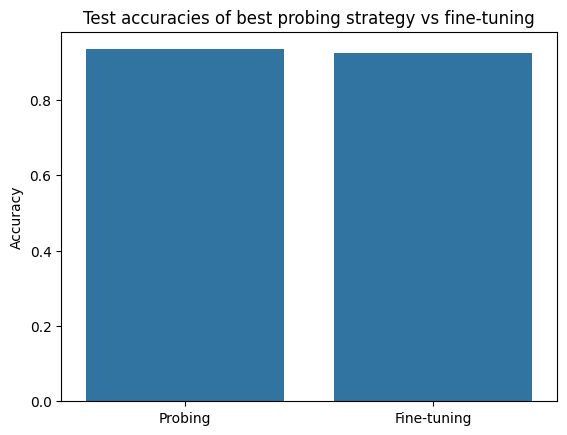

In [ ]:
# barplot displaying accuracies of probing vs fine-tuning
sns.barplot(x=['Probing', 'Fine-tuning'], y=[0.934, 0.9232894736842105])
plt.title('Test accuracies of best probing strategy vs fine-tuning')
plt.ylabel('Accuracy')

### 3.4 Attention matrix visualization

#### Since there are 4 classes, and we need an example of an attention matrix for a positive and negative example for each class, we will need a total of 8 attention matrices. To this end, let's use the validation set to generate predictions and get a positive and negative example for each class

In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

# define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

# create DataLoader
val_loader = DataLoader(val_ds, batch_size=16)

# collect predictions and labels with the raw texts
def get_predictions_with_text(model, dataloader, dataset, device):
    model.eval()
    all_preds = []
    all_labels = []
    all_texts = []

    for i, batch in enumerate(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

        # get the original texts (match batch idx to dataset)
        start_idx = i * dataloader.batch_size
        end_idx = start_idx + len(labels)
        texts = dataset[start_idx:end_idx]['text']
        all_texts.extend(texts)

    return all_preds, all_labels, all_texts

In [ ]:
# run prediction
preds, labels, texts = get_predictions_with_text(model2, val_loader, val_ds, device)

# extract one correct and one incorrect example per class
examples_by_class = {i: {'correct': None, 'incorrect': None} for i in range(4)}

for text, pred, true_label in zip(texts, preds, labels):
    if pred == true_label and examples_by_class[true_label]['correct'] is None:
        examples_by_class[true_label]['correct'] = (text, pred, true_label)
    elif pred != true_label and examples_by_class[true_label]['incorrect'] is None:
        examples_by_class[true_label]['incorrect'] = (text, pred, true_label)

    # stop early if we found all
    if all(v['correct'] and v['incorrect'] for v in examples_by_class.values()):
        break

# print results
for cls, example in examples_by_class.items():
    print(f"\nClass {cls}:")
    print(f"✅ Correct:\n  Text: {example['correct'][0]}\n  Predicted: {example['correct'][1]}\n  True: {example['correct'][2]}")
    print(f"❌ Incorrect:\n  Text: {example['incorrect'][0]}\n  Predicted: {example['incorrect'][1]}\n  True: {example['incorrect'][2]}")



Class 0:
✅ Correct:
  Text: Israel Hints Ousting Arafat Delayed by Gaza Pullout  JERUSALEM (Reuters) - Israel renewed its threat on Monday  to remove Yasser Arafat but hinted it had delayed taking action  against the Palestinian president to avoid complicating a  planned withdrawal from the Gaza Strip.
  Predicted: 0
  True: 0
❌ Incorrect:
  Text: France Telecom unions call for strike to protest privatization &lt;b&gt;...&lt;/b&gt; PARIS : French trade unions called on workers at France Telecom to stage a 24-hour strike September 7 to protest government plans to privatize the public telecommunications operator, union sources said.
  Predicted: 2
  True: 0

Class 1:
✅ Correct:
  Text: Woodgate out to prove his worth at Real Madrid Jonathan Woodgate says he has learned from his past mistakes off the pitch and is now determined to make the headlines solely for his footballing prowess after completing a dream move to Real Madrid.
  Predicted: 1
  True: 1
❌ Incorrect:
  Text: Back in the s

#### Now that we have gotten positive and negative examples for all 4 classes, we can now display the attention matrices

In [ ]:
from bertviz import head_view
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cls_attention_heatmap(text, class_id, kind, layer=0, head=0, save=True):
    inputs = tokenizer2.encode_plus(
        text,
        return_tensors='pt',
        add_special_tokens=True,
        truncation=True,
        max_length=128
    )

    input_ids = inputs['input_ids'].to(model2.device)
    attention_mask = inputs['attention_mask'].to(model2.device)

    with torch.no_grad():
        outputs = model2(input_ids=input_ids, attention_mask=attention_mask, output_attentions=True)

    # extract attention for chosen layer and head
    attn = outputs.attentions[layer][0, head].cpu().numpy()  # Shape: [seq_len, seq_len]
    tokens = tokenizer2.convert_ids_to_tokens(input_ids[0])

    # extract the CLS row (first row of the attention matrix)
    cls_row = attn[0, :]  # Only the attention from CLS token to all tokens

    # plot the CLS attention heatmap
    plt.figure(figsize=(10, 2))
    sns.heatmap(cls_row.reshape(1, -1), cmap="viridis", xticklabels=tokens, yticklabels=["CLS"], cbar_kws={'label': 'Attention Weight'}, square=True)
    plt.title(f"Class {class_id} - {kind.title()} - Layer {layer}, Head {head}")
    plt.xticks(rotation=90)
    plt.tight_layout()

    if save:
        filename = f"class{class_id}_{kind}_cls_layer{layer}_head{head}.png"
        plt.savefig(filename, dpi=300)
        print(f"Saved: {filename}")
    else:
        plt.show()

    plt.close()

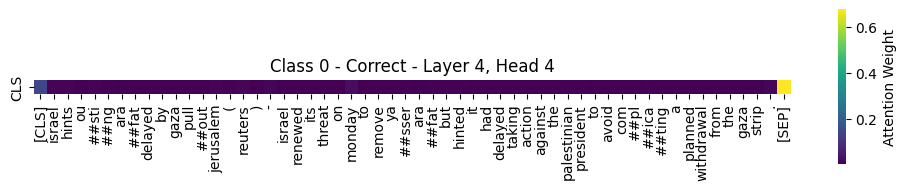

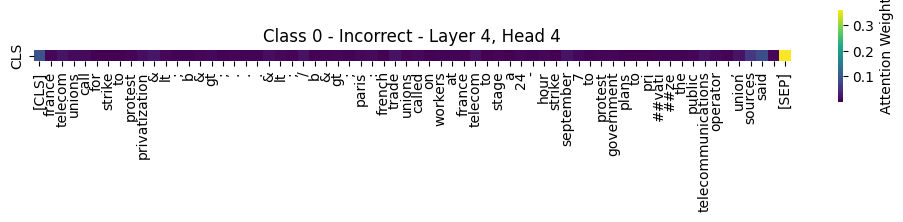

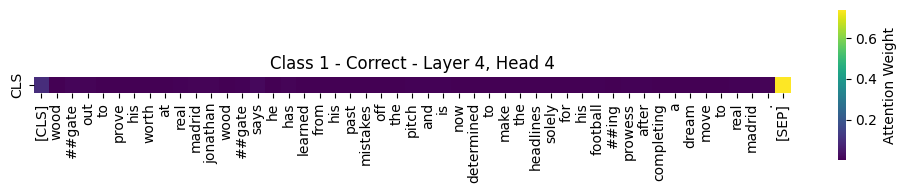

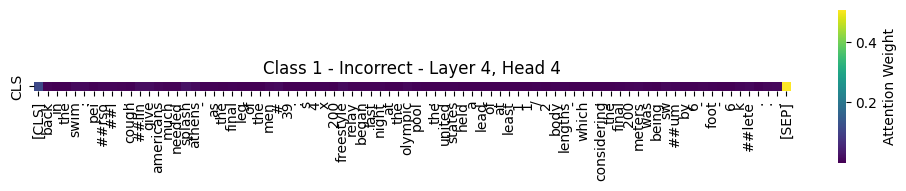

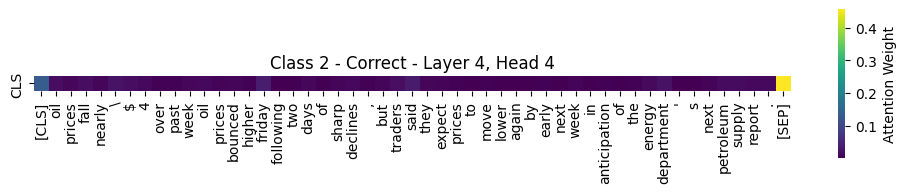

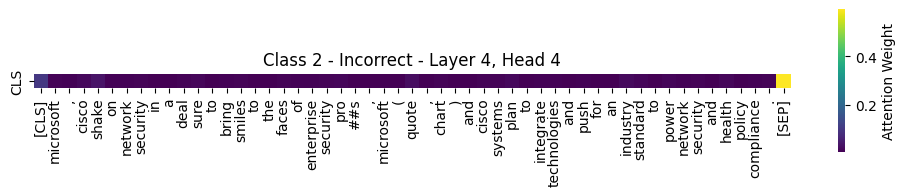

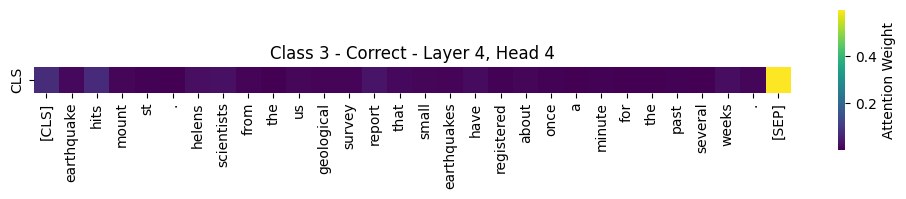

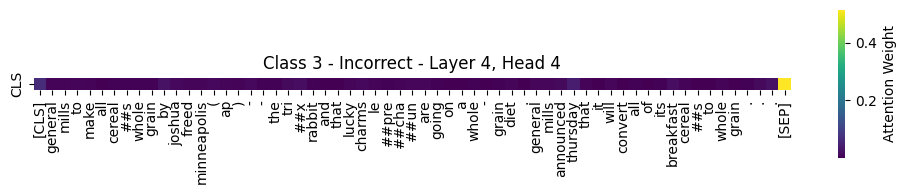

In [ ]:
# visualization
layer = 4
head = 4

for class_id in range(4):
    pos_text = examples_by_class[class_id]["correct"][0]
    neg_text = examples_by_class[class_id]["incorrect"][0]

    plot_cls_attention_heatmap(pos_text, class_id, "correct", layer=layer, head=head, save=False)
    plot_cls_attention_heatmap(neg_text, class_id, "incorrect", layer=layer, head=head, save=False)